In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import re
from os.path import exists
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import string

In [111]:
import ressources as rss
import letter_detection_utils as ld_util

In [4]:
rss.init()

In [6]:
def extract_allowed_chars_from_string(char_list, str):
    res = ''
    for letter in str:
        if letter in char_list:
            res += letter
    return res

In [7]:
df = pd.read_pickle('../pickle/df.pickle')
df['clean_trans'] = df.transcription.apply(lambda x: extract_allowed_chars_from_string(rss.charList, x))
df = df[(df['clean_trans'] != "") & (df['clean_trans'] == df['transcription'])]
X_train, X_test, y_train, y_test = train_test_split(df['word_img_path'].values, df['transcription'].values, test_size=0.1, random_state=42)
    

In [249]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [250]:
train_datagen = ImageDataGenerator(
    rotation_range=3,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=[1,1.8],
    channel_shift_range=0.0,
    fill_mode='constant',
    cval=255,
    rescale=1./255,
    data_format=None,
)

In [251]:
test_datagen = ImageDataGenerator(
    )

In [252]:
df_train = pd.DataFrame({'word_img_path' : X_train, 'transcription' : y_train})
df_test = pd.DataFrame({'word_img_path' : X_test, 'transcription' : y_test})

In [253]:
train_dataset = train_datagen.flow_from_dataframe(dataframe = df_train,
                                                 directory=None,
                                                 x_col='word_img_path',
                                                 y_col='transcription',
                                                 class_mode='raw',
                                                 batch_size=64,
                                                 target_size= (32,128,),
                                                 shuffle = False,
                                                 keep_aspect_ratio = True)

Found 85407 validated image filenames.


In [254]:
test_dataset = train_datagen.flow_from_dataframe(dataframe = df_test,
                                                 directory=None,
                                                 x_col='word_img_path',
                                                 y_col='transcription',
                                                 class_mode='raw',
                                                 batch_size=64,
                                                 target_size= (32,128,),
                                                 shuffle = False
                                                 )

Found 9490 validated image filenames.


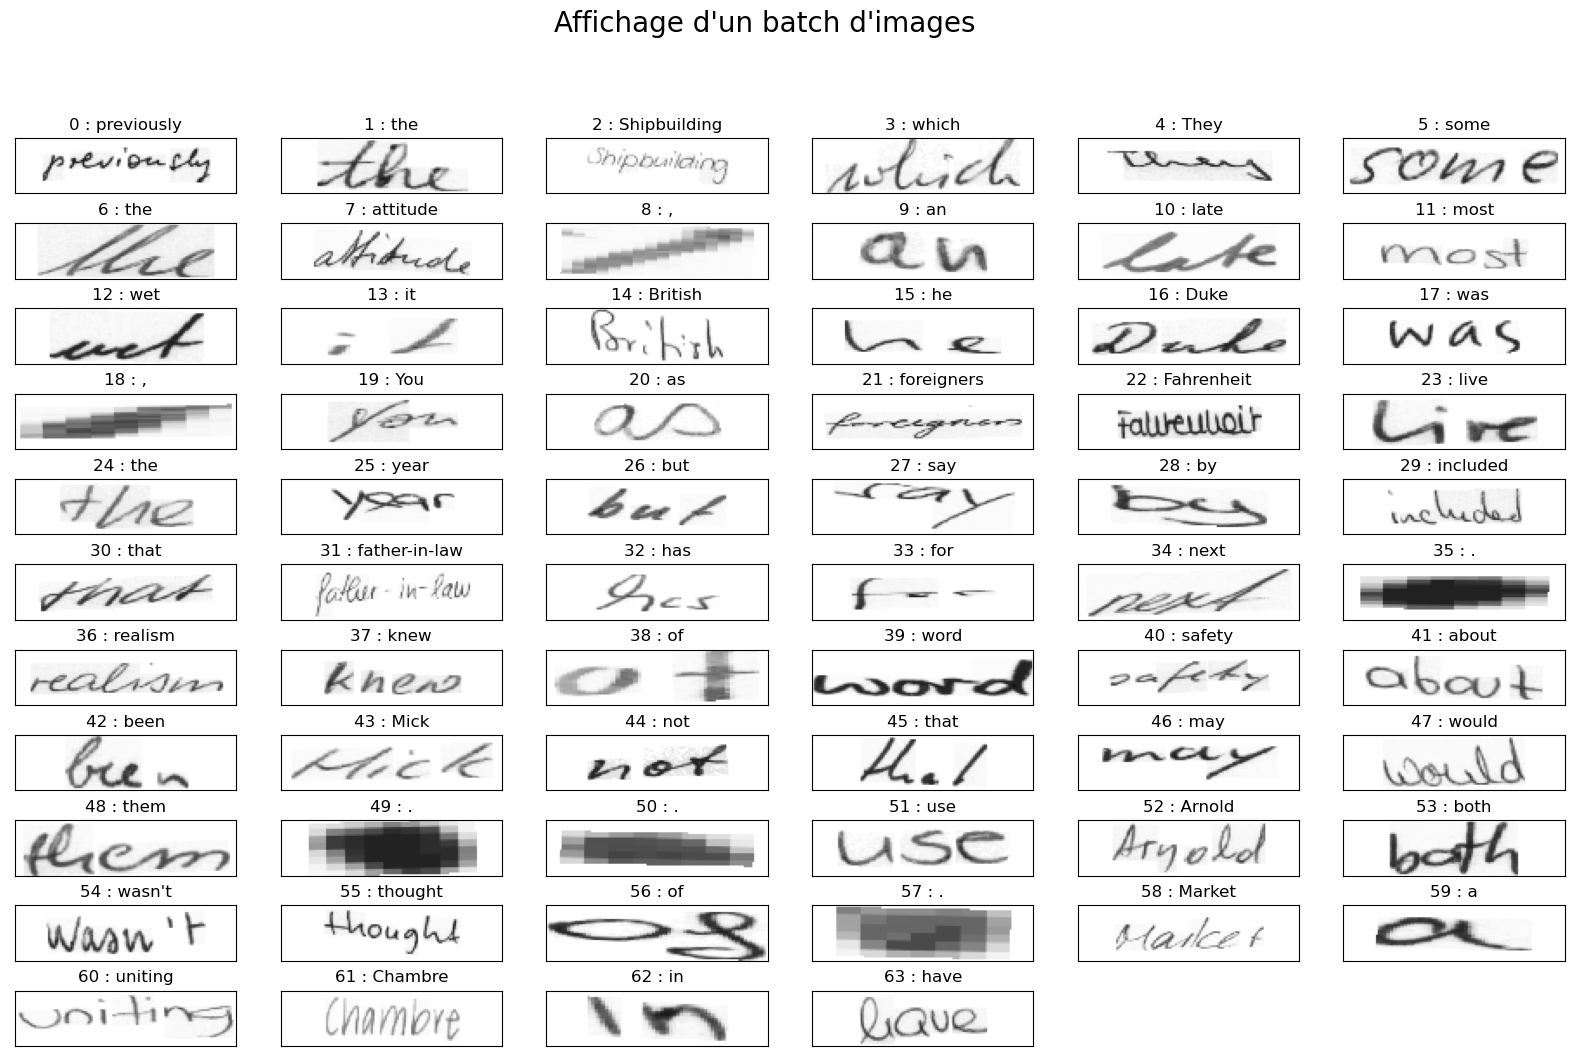

In [256]:
lin = 11
col = 6

x, y = train_dataset.next()

liste_i = range(64)
fig = plt.figure(figsize=(20,12))

for i in range(len(liste_i)):
    img = x[i]
    fig.add_subplot(lin,col,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(str(i)+' : '+str(y[i]))
    plt.xticks([], [])
    plt.yticks([], [])
    plt.suptitle('Affichage d\'un batch d\'images', size = 20)
    ;